In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from array import array

In [6]:
#cargar data set
data_array = np.load ('data_proyecto/proyecto_data/proyecto_training_data.npy')

In [83]:
# variables seleccionadas
stFlrSF =data_array[:,2]
OverallQual=data_array[:,1]
YearBuilt=data_array[:,4]
SalesPrice =data_array[:,0]

In [108]:
class Paramet():
    def __init__(self,hist_theta,hist_grad,hist_cost,n_iter):
        self.thetas=dict(zip(np.array(n_iter) ,np.array(hist_theta)))
        self.errores=dict(zip(np.array(n_iter),np.array(hist_cost)))
        self.gradientes=dict(zip(np.array(n_iter) ,np.array(hist_grad)))
        self.iteraciones=np.array(n_iter)   
    @classmethod
    def parametros(cls,hist_theta,hist_grad,hist_cost,n_iter):
        return cls(hist_theta,histo_grad,histo_cost,n_iter)
        
    
class Regresion():
    
    def __init__(self,X_train,X_test,y_train,y_test,α,epochs):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.α=α
        self.epochs=epochs
        self.x_b=np.hstack([self.X_train,np.ones_like(self.X_train)])
        
    def __del__(self):
        pass
    
    def funCosto(self,betas):
        return np.sum(np.square((self.x_b.dot(betas) - self.y_train))) / (2 * len(self.X_train))  # Calculo del error
    
    def betasAct(self,theta): # Thetas actualizado
        theta[0][0]=theta[0][0] - self.α * np.sum((self.x_b.dot(theta) - self.y_train)) / (len(self.X_train))
        theta[1][0]=theta[1][0] - self.α * np.sum(np.transpose((self.x_b.dot(theta) - self.y_train)) * (np.transpose(np.transpose(self.x_b)[1]))) / (len(self.X_train))
        return theta
    
    def funGrad(self,theta): # Gradiente  actualizado
        b0=self.α * np.sum((self.x_b.dot(theta) - self.y_train)) / (len(self.X_train))
        b1=self.α * np.sum(np.transpose((self.x_b.dot(theta) - self.y_train)) * (np.transpose(np.transpose(self.x_b)[1]))) / (len(self.X_train))
        return b0,b1
 
    def DescGrad(self):
        hist_cost = []                      # Lista vacia para almacenar el error en cada iteracion
        hist_grad = []                      # Lista vacia para almacenar el gradiente del error
        n_iter = []                         # Lista vacia para almacenar el numero de iteracion correcpondiente al error
        hist_theta=[]                       # Lista vacia para almacenar todos los betas
        theta = [[0],[0]]                   # Inicializacion de los parametros b0 y b1 del modelo
        for _ in range(self.epochs):
            theta= self.betasAct(theta)
            hist_theta.append([theta[0][0],theta[1][0]])
            hist_cost.append(self.funCosto(theta))
            hist_grad.append(self.funGrad(theta))
            n_iter.append(_)
        
        return  Paramet(hist_theta,hist_grad,hist_cost,n_iter)
            
    def prediccion(self,x,thetas_hist):
        #x=np.array(x).reshape(-1,1)
        #thetas_hist=np.array(thetas_hist).reshape(-1,1)
        x=np.hstack([x,np.ones_like(x)])
        pred=x.dot(thetas_hist)
        return pred
        
    @classmethod 
    def parametros(cls,X,Y,α,epoch):
        X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size = 0.20,shuffle=False)

        X_train=np.reshape(X_train,(-1,1))
        y_train=np.reshape(y_train,(-1,1)) # Vector dividido entre 1000 ya que las variables se desvordan por ser valores muy grandes
        X_test=np.reshape(X_test,(-1,1))
        y_test=np.reshape(y_test,(-1,1))
        return cls(X_train,X_test,y_train,y_test,α,epoch)
    
# Graficar el error con cada iteracion
class graficasv():
    def plot_error(self,x,y):
            plt.plot(x,y)
            plt.xlabel('Iteraciones')
            plt.ylabel('Error')
            plt.title("Comportamiento del error en el tiempo")
            plt.show()

    # Graficar los modelos
    def plot_model(self,betas):
        b=betas[0]
        a=betas[1]
       # plt.scatter(rl.X_train, rl.y_train)
        pred_x = [0, max(rl.X_test)]
        pred_y = [a+b*0, a+b*max(rl.X_test)]
        plt.title('Modelos')
        plt.plot(pred_x, pred_y, "k")
    
    # Metodo para graficar todos los modelos
    def graficar_modelos(self,n):
        for i in range(0,len(xc.iteraciones)+1,n):
            self.plot_model(xc.thetas[i]) 
        plt.scatter(rl.X_train, rl.y_train)
        
class Estimacion():
        
    def estimaciones (self,x,theta_manual,theta_sklearn):
        x=np.hstack([x,np.ones_like(x)])
        pred_manual=x.dot(theta_manual)
        pred_sklearn=x.dot(theta_sklearn)
        pred_prom=(pred_manual+pred_sklearn)/2
        return pred_manual,pred_sklearn,pred_prom


In [140]:
rl=Regresion.parametros(OverallQual,SalesPrice,0.7,850)
xc=rl.DescGrad()
d=graficasv()

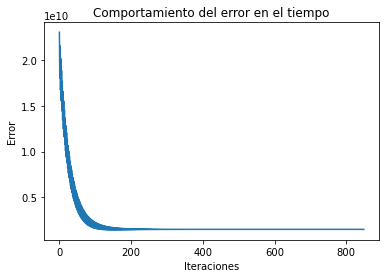

In [141]:
#Graficar comportamiento del error
d.plot_error(xc.errores.keys(),xc.errores.values())

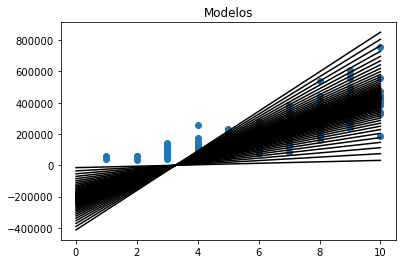

In [143]:
d.graficar_modelos(3)

In [144]:

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
# Entrnamiento del modelo
regr.fit(rl.X_train,rl.y_train)
# prredicciones 
y_pred = regr.predict(rl.X_train)
# Thetas finales para el modelo de sklearn
theta2=float(regr.coef_),float(regr.intercept_)
theta2=np.array(theta2).reshape(1,-1)
theta2[-1]
# Error Cuadrado Medio
#print("Mean squared error: %.2f" % mean_squared_error(rl.y_train,y_pred))

array([ 45411.99877916, -96469.57131874])

In [145]:
theta1=xc.thetas[len(xc.iteraciones)-1]
theta1

array([  63805.86330542, -208691.06078712])

In [146]:
predic= Estimacion()

In [147]:
a,b,c=predic.estimaciones(rl.X_test,theta1,theta2[-1])

In [148]:
e_manual=mean_squared_error(a,rl.y_test)
e_sklearn=mean_squared_error(b,rl.y_test)
e_promedio=mean_squared_error(c,rl.y_test)

list

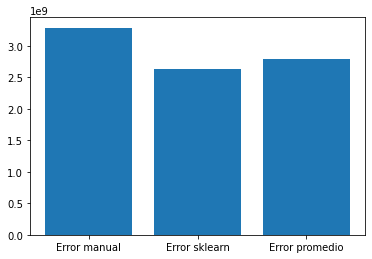

In [149]:
e_total=[e_manual,e_sklearn,e_promedio]
label=['Error manual','Error sklearn','Error promedio']
plt.bar(label,e_total)
type(e_total)

In [77]:
print(e_manual)
print(e_sklearn)
print(e_promedio)

4622.477255868515
4585.538274691874
4603.204636657498
